<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Cleeaned-Database" data-toc-modified-id="Import-Cleeaned-Database-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Cleeaned Database</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model 1</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Insight-Model-1:" data-toc-modified-id="Insight-Model-1:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Insight Model 1:</a></span><ul class="toc-item"><li><span><a href="#Improvements" data-toc-modified-id="Improvements-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Improvements</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineer" data-toc-modified-id="Feature-Engineer-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineer</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
from matplotlib.colors import BASE_COLORS

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


# Import Cleeaned Database
- df: cleaned data base with offer_accepted and offer (to apply the model need to drop one of them);
- df_dummies: dataframe with dummies on the categorical values (also need to drop offer or offer_accepted);

In [9]:
df = pd.read_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\python\df.xlsx')
df_dummies = pd.read_excel(r'C:\Users\Raphael Costa\Desktop\Thiago\Data Mining\IronHack\GitHub\FCDATA\python\df_dummies.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   offer_accepted        18000 non-null  object 
 1   reward                18000 non-null  object 
 2   mailer_type           18000 non-null  object 
 3   income_level          18000 non-null  object 
 4   accounts_open         18000 non-null  int64  
 5   overdraft_protection  18000 non-null  object 
 6   credit_rating         18000 non-null  object 
 7   credit_cards_held     18000 non-null  int64  
 8   homes_owned           18000 non-null  int64  
 9   household_size        18000 non-null  int64  
 10  own_your_home         18000 non-null  object 
 11  average_balance       18000 non-null  float64
 12  q1_balance            18000 non-null  int64  
 13  q2_balance            18000 non-null  int64  
 14  q3_balance            18000 non-null  float64
 15  q4_balance         

In [24]:
df_dummies.head(0)

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,accounts_open,credit_cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance


# Model 1
- use df_dummies (doesn't have average_balance and offer)
- target offer_accepted_Yes

In [25]:
y = df_dummies['offer_accepted_Yes']
X1 = df_dummies.drop(['offer_accepted_Yes'], axis=1)

In [19]:
y.value_counts()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

In [26]:
X1.head(0)

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes,accounts_open,credit_cards_held,homes_owned,household_size,q1_balance,q2_balance,q3_balance,q4_balance


## Train Test Split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.45,random_state=40)

LogisticRegression(max_iter=3000) accuracy: 0.9407407407407408
RandomForestClassifier(n_estimators=200, random_state=0) accuracy: 0.9403703703703704
KNeighborsClassifier() accuracy: 0.9391358024691357
GradientBoostingClassifier(random_state=0) accuracy: 0.9402469135802469


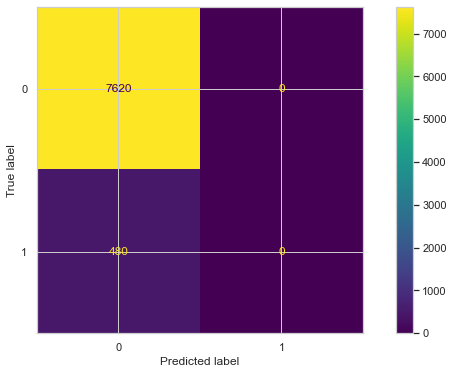

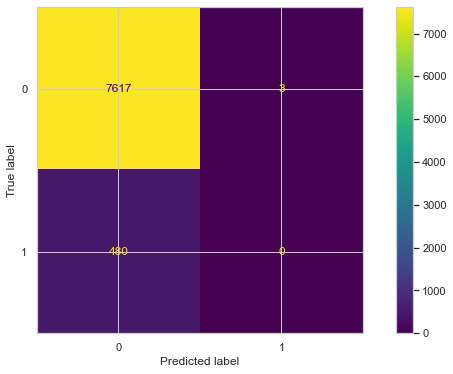

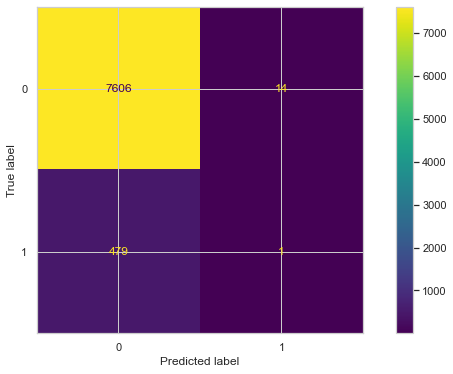

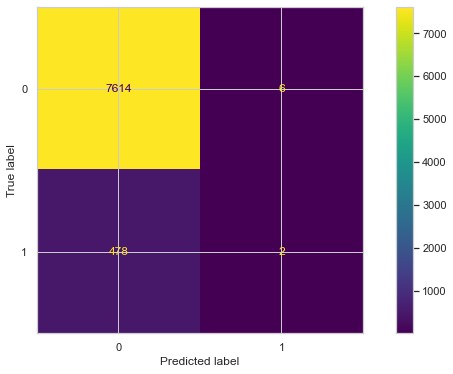

In [33]:
## for lop applying different methods
classifiers = ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier','GradientBoostingClassifier']
models = [
          LogisticRegression(max_iter = 3000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)
         ]

for i in models:
    model = i
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model,'accuracy:',accuracy_score(y_test,y_pred))
    cmx=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
    disp.plot()

## Insight Model 1:
- the accuracy is high, but the model is learning better to predict 'No' than 'Yes' (imbalanced data). In this case we are going to use some resampling methods. 
- +- 17k 'No', 1k 'Yes' 

### Improvements
- check witch scaler is going to be the best one to use it.



# Feature Engineer
- concat income_level and credit_rating:

In [ ]:
df['income_credit'] = df["income_level"] +'_'+ df["credit_rating"]
example = df.loc[df['offer_accepted']=='Yes']
example['income_credit'].value_counts()

- with Medium and Low income and credit rating we have almost 74% of the 'yes'.
- Best Clients : high income and high or medium credit_rating;
- Regular Client: Medium income and medium credit_rating;